In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Load Data and merge 2 files

In [3]:
athlete = pd.read_csv('athlete_events.csv')
region = pd.read_csv('noc_regions.csv')
merged = pd.merge(athlete,region, on = 'NOC', how='left')

In [4]:
merged.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [5]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
region    270746 non-null object
notes     5039 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


# Extracting swimming data

In [6]:
swimming = merged.loc[(merged['Sport'] == 'Swimming')]
print("Swimming Data Dimension:",swimming.shape)
print("Type:",type(swimming))
swimming.head()

Swimming Data Dimension: (23195, 17)
Type: <class 'pandas.core.frame.DataFrame'>


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN,Finland,NaN
35,15,Arvo Ossian Aaltonen,M,22.0,NaN,NaN,Finland,FIN,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Men's 200 metres Breaststroke,NaN,Finland,NaN
36,15,Arvo Ossian Aaltonen,M,22.0,NaN,NaN,Finland,FIN,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Men's 400 metres Breaststroke,NaN,Finland,NaN
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,NaN
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,NaN


# Information and missing data

In [7]:
swimming.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23195 entries, 29 to 271088
Data columns (total 17 columns):
ID        23195 non-null int64
Name      23195 non-null object
Sex       23195 non-null object
Age       22671 non-null float64
Height    19150 non-null float64
Weight    18804 non-null float64
Team      23195 non-null object
NOC       23195 non-null object
Games     23195 non-null object
Year      23195 non-null int64
Season    23195 non-null object
City      23195 non-null object
Sport     23195 non-null object
Event     23195 non-null object
Medal     3048 non-null object
region    23048 non-null object
notes     515 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 3.2+ MB


# Missing data

In [8]:
swimming.isnull().sum()

ID            0
Name          0
Sex           0
Age         524
Height     4045
Weight     4391
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     20147
region      147
notes     22680
dtype: int64

# Check medal

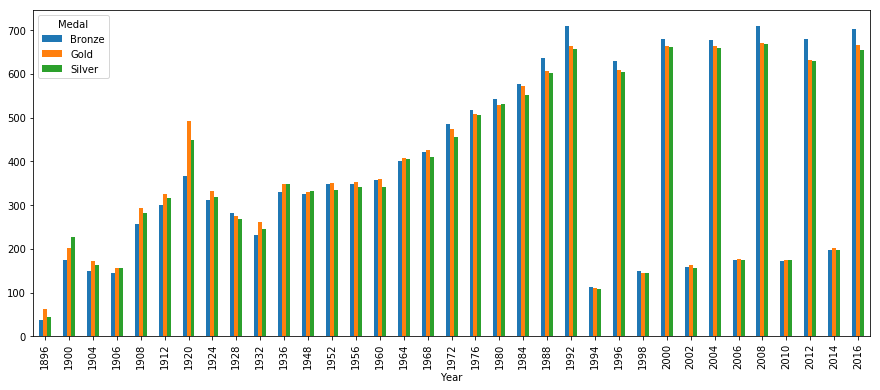

In [9]:
merged.groupby(['Year', 'Medal'])['Medal'].count().unstack().plot(kind='bar',figsize=(15,6))

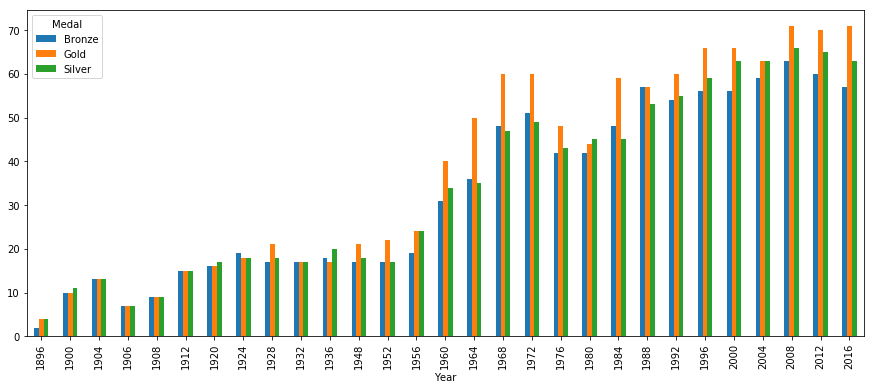

In [10]:
swimming.groupby(['Year', 'Medal'])['Medal'].count().unstack().plot(kind='bar',figsize=(15,6))

Turns out swimming only in summer

In [11]:
print('Swimming season:',swimming['Season'].unique())

Swimming season: ['Summer']


# Average Age, Height and Weight

/home/nhan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


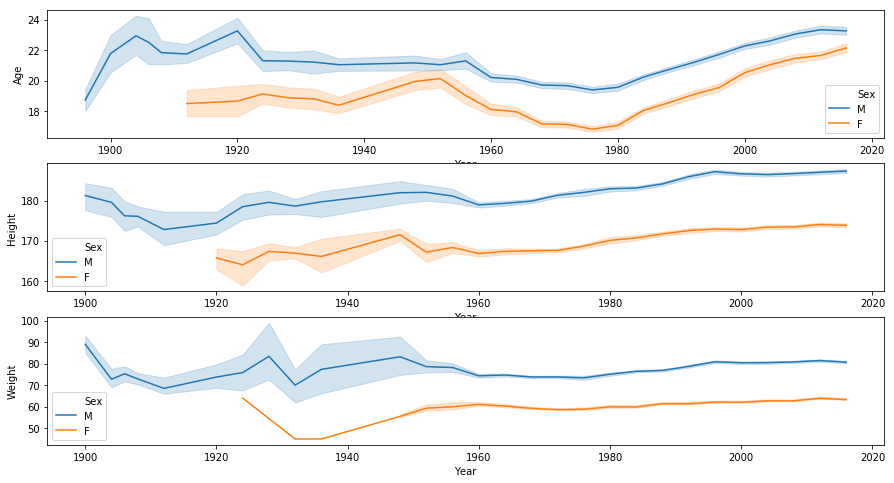

In [12]:
a4_dims = (15, 8)
fig, axes = plt.subplots(3,1,figsize=a4_dims)
sb.lineplot(ax = axes[0], x='Year',y='Age',hue='Sex',data=swimming)
sb.lineplot(ax = axes[1], x='Year',y='Height',hue='Sex',data=swimming)
sb.lineplot(ax = axes[2], x='Year',y='Weight',hue='Sex',data=swimming)

# Number of attendants

In [13]:
check = swimming.groupby('Year')[['Age','Weight','Height']].count()
check.tail()

,Age,Weight,Height
Year,,,
2000,1741,1716,1718
2004,1618,1611,1612
2008,1749,1722,1726
2012,1538,1518,1522
2016,1568,1535,1535


In [14]:
check['Total attendants'] = swimming['Year'].value_counts()


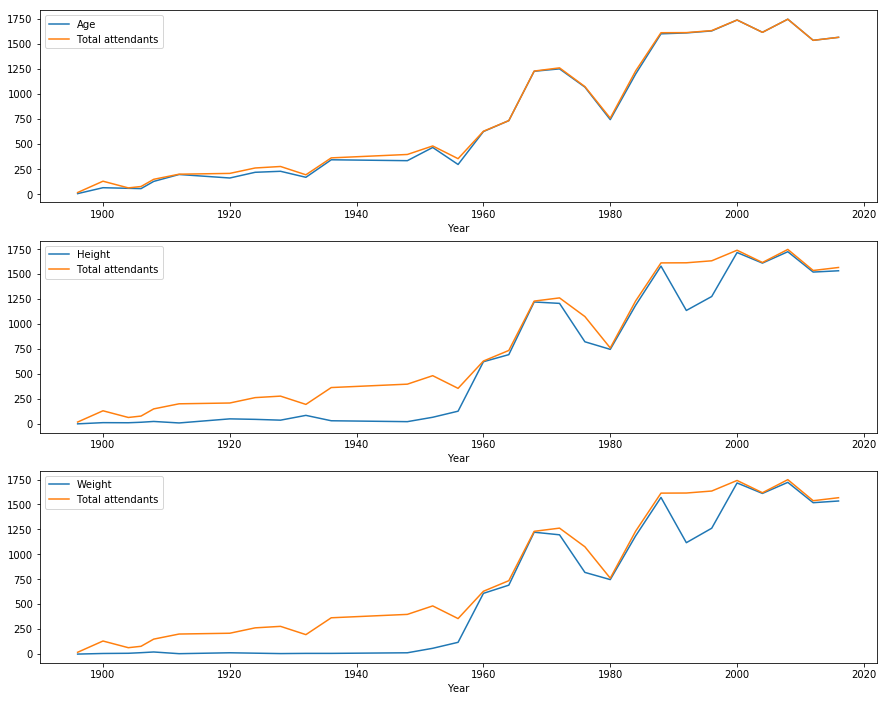

In [21]:
a4_dims = (15, 12)
fig, axes = plt.subplots(3,1,figsize=a4_dims)
check.plot.line(ax = axes[0],y=['Age','Total attendants'])
check.plot.line(ax = axes[1],y=['Height','Total attendants'])
check.plot.line(ax = axes[2],y=['Weight','Total attendants'])

In [25]:
check['non-null Age'] = check['Age']/check['Total attendants']
check['non-null Height'] = check['Height']/check['Total attendants']
check['non-null Weight'] = check['Weight']/check['Total attendants']
check.head()

,Age,Weight,Height,Total attendants,non-null Height,non-null Age,non-null Weight
Year,,,,,,,
1896,7,0,0,18,0.000000,0.388889,0.000000
1900,66,6,12,131,0.091603,0.503817,0.045802
1904,60,8,11,64,0.171875,0.937500,0.125000
1906,57,14,16,78,0.205128,0.730769,0.179487
1908,129,21,24,150,0.160000,0.860000,0.140000


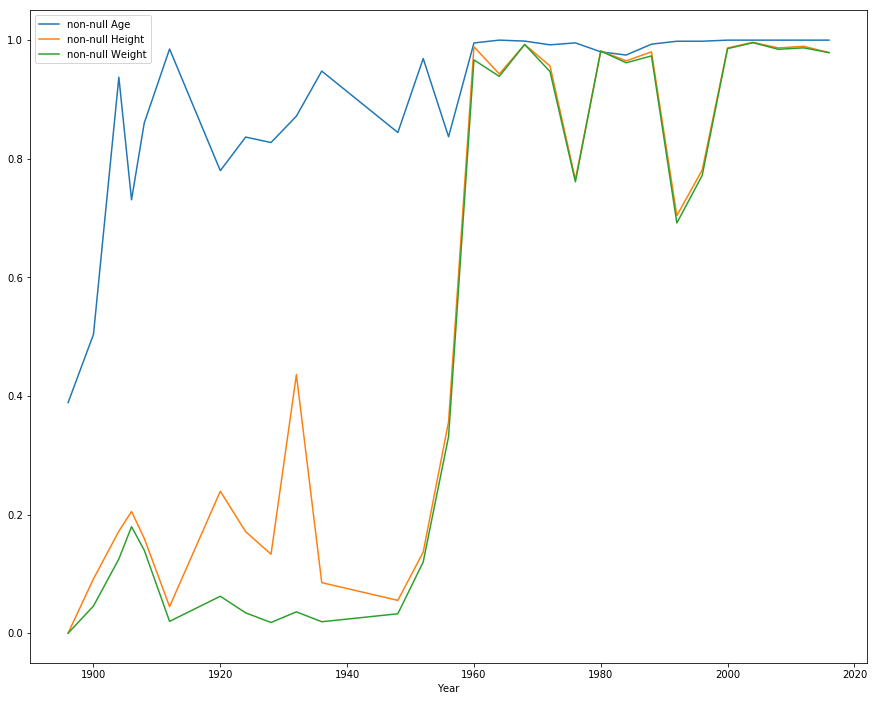

In [26]:
a4_dims = (15, 12)
fig, axes = plt.subplots(figsize=a4_dims)
check.plot.line(ax=axes,y=['non-null Age','non-null Height','non-null Weight'])

Until 1960, there were lots of missing Height and Weight data.

# Handling missing data

Only take data from 1960 til now

In [32]:
swimmingFrom60 = swimming[swimming['Year']>=1960]
swimmingFrom60.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20007 entries, 100 to 271088
Data columns (total 17 columns):
ID        20007 non-null int64
Name      20007 non-null object
Sex       20007 non-null object
Age       19924 non-null float64
Height    18615 non-null float64
Weight    18521 non-null float64
Team      20007 non-null object
NOC       20007 non-null object
Games     20007 non-null object
Year      20007 non-null int64
Season    20007 non-null object
City      20007 non-null object
Sport     20007 non-null object
Event     20007 non-null object
Medal     2430 non-null object
region    19862 non-null object
notes     439 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 2.7+ MB


# Replace NaN value in Medal column

In [33]:
swimmingFrom60['Medal'].fillna(value='No Medal',inplace = True)

/home/nhan/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [58]:
swimmingFrom60.loc[(swimmingFrom60['Year']==1976) & (swimmingFrom60['Team']=='Philippines')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
25915,13523,Edwin Borja,M,18.0,160.0,47.0,Philippines,PHI,1976 Summer,1976,Summer,Montreal,Swimming,Swimming Men's 400 metres Freestyle,No Medal,Philippines,NaN
25916,13523,Edwin Borja,M,18.0,160.0,47.0,Philippines,PHI,1976 Summer,1976,Summer,Montreal,Swimming,"Swimming Men's 1,500 metres Freestyle",No Medal,Philippines,NaN
25917,13523,Edwin Borja,M,18.0,160.0,47.0,Philippines,PHI,1976 Summer,1976,Summer,Montreal,Swimming,Swimming Men's 200 metres Butterfly,No Medal,Philippines,NaN
25918,13523,Edwin Borja,M,18.0,160.0,47.0,Philippines,PHI,1976 Summer,1976,Summer,Montreal,Swimming,Swimming Men's 400 metres Individual Medley,No Medal,Philippines,NaN
52255,26853,Nancy Deano,F,NaN,NaN,NaN,Philippines,PHI,1976 Summer,1976,Summer,Montreal,Swimming,Swimming Women's 100 metres Breaststroke,No Medal,Philippines,NaN
52256,26853,Nancy Deano,F,NaN,NaN,NaN,Philippines,PHI,1976 Summer,1976,Summer,Montreal,Swimming,Swimming Women's 200 metres Breaststroke,No Medal,Philippines,NaN
52257,26853,Nancy Deano,F,NaN,NaN,NaN,Philippines,PHI,1976 Summer,1976,Summer,Montreal,Swimming,Swimming Women's 400 metres Individual Medley,No Medal,Philippines,NaN
204203,102524,Gerardo Rosario,M,23.0,175.0,57.0,Philippines,PHI,1976 Summer,1976,Summer,Montreal,Swimming,Swimming Men's 100 metres Freestyle,No Medal,Philippines,NaN
204204,102524,Gerardo Rosario,M,23.0,175.0,57.0,Philippines,PHI,1976 Summer,1976,Summer,Montreal,Swimming,Swimming Men's 200 metres Freestyle,No Medal,Philippines,NaN
204205,102524,Gerardo Rosario,M,23.0,175.0,57.0,Philippines,PHI,1976 Summer,1976,Summer,Montreal,Swimming,Swimming Men's 100 metres Backstroke,No Medal,Philippines,NaN
